In [29]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gensim
import warnings
from gensim.models import Word2Vec
import pickle

warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [30]:
dataset = pd.read_csv("Hotel_dataset.csv")
reviews = [w for w in dataset["Review"]]
tokenized_words = [gensim.utils.simple_preprocess(w) for w in reviews]

In [31]:
# CBOW model
CBOW = gensim.models.Word2Vec(tokenized_words, min_count = 1,
                              vector_size = 100, window = 5)

In [32]:
# Skip Gram model
Skip_Gram = gensim.models.Word2Vec(tokenized_words, min_count = 1,
                                   vector_size = 100, window = 5, sg = 1)

In [33]:
# 10 most similar words to "hotel" - CBOW
print(CBOW.wv.most_similar('hotel'))

[('property', 0.6567264199256897), ('hotels', 0.5954607725143433), ('hilton', 0.5566701889038086), ('central', 0.5402378439903259), ('amsterdam', 0.5390459299087524), ('centrally', 0.5385405421257019), ('pickwick', 0.536456823348999), ('boston', 0.5306843519210815), ('accommodation', 0.529130756855011), ('granados', 0.5274788737297058)]


In [34]:
# 10 most similar words to "hotel" - Skip-Gram
print(Skip_Gram.wv.most_similar('hotel'))

[('granados', 0.8342074155807495), ('sumner', 0.8319681882858276), ('principal', 0.8300634026527405), ('fantastically', 0.8285501599311829), ('alba', 0.825036883354187), ('suburb', 0.8207505941390991), ('pluses', 0.8184846639633179), ('andra', 0.8154661655426025), ('travelodge', 0.8152617812156677), ('digs', 0.8136069178581238)]


In [35]:
print("Similarity between the words 'hotel' " +
"and 'room' - Word2vec CBOW : ",
CBOW.wv.similarity('hotel', 'room'))

Similarity between the words 'hotel' and 'room' - Word2vec CBOW :  0.3350409


In [36]:
print("Similarity between the words 'hotel' " +
"and 'room' - Word2vec Skip Gram : ",
Skip_Gram.wv.similarity('hotel', 'room'))

Similarity between the words 'hotel' and 'room' - Word2vec Skip Gram :  0.63881767


In [37]:
# word vector for "hotel" - CBOW
CBOW.wv["hotel"]

array([ 1.3320521 , -0.27255416, -0.29089558,  0.40411595, -1.8904995 ,
       -0.01652337,  1.1428441 ,  0.6440376 , -0.3024923 , -1.3692763 ,
       -0.25653386, -0.0997182 , -0.5715361 ,  0.490204  ,  1.5630435 ,
        1.0657414 ,  0.90493315,  1.2935921 , -0.9414102 , -0.8482766 ,
        0.927677  ,  1.5910937 , -0.26893398,  1.3408849 ,  0.94726026,
       -1.665314  , -0.45365518,  0.13623942, -0.82677543,  0.3164727 ,
       -1.5263723 ,  1.2769052 ,  0.26219565, -1.0437715 , -1.8839079 ,
       -0.97302306,  0.71074635,  0.4907431 , -0.265028  ,  1.3004159 ,
        0.0942222 ,  0.60559803, -1.1423281 , -0.28336522,  0.81535137,
        0.5491871 , -0.9472199 ,  0.82653975,  0.27161348, -0.5312284 ,
       -0.3248947 ,  0.73022455, -0.7078871 , -0.7563318 , -0.8529786 ,
        0.09115585, -0.4006204 , -0.5937219 ,  0.39375523,  1.702798  ,
        0.96831536,  0.7574695 ,  0.42913458, -0.46312514, -1.0439546 ,
       -1.316612  ,  0.15447934,  1.559853  , -0.08118337,  0.94

In [38]:
# word vector for "hotel" - Skip-Gram
Skip_Gram.wv["hotel"]

array([-0.04155179,  0.0862861 ,  0.01751917, -0.380105  , -0.56984997,
       -0.17019886,  0.37843058,  0.6758794 ,  0.01248899, -0.11667135,
       -0.07697765, -0.36184254, -0.31020045,  0.04743012, -0.10311513,
       -0.05978414,  0.02017144,  0.09871303, -0.21506295, -0.32834035,
        0.1781309 ,  0.3883741 , -0.09037273,  0.09626234,  0.12767306,
        0.01941334, -0.09303152, -0.06833485, -0.3909628 ,  0.39205238,
        0.06745459,  0.25382516,  0.31487912, -0.24186647, -0.20604667,
        0.09396545, -0.20131682, -0.10839626, -0.12296202,  0.09963858,
       -0.40026572, -0.1512338 , -0.5696302 ,  0.05547721,  0.15464959,
       -0.23691154, -0.03245516,  0.00514217,  0.165482  ,  0.4520302 ,
        0.44709   , -0.10727974, -0.02841475, -0.15450604, -0.61734384,
        0.21492994,  0.09226525, -0.02950972,  0.1295681 ,  0.1929809 ,
        0.20224914,  0.06634237,  0.10911951,  0.02790071, -0.39537242,
        0.03703753, -0.11738549,  0.47755718, -0.22401144,  0.30

In [60]:
def display_closestwords_tsnescatterplot(model, modelName, word, size):
    
    arr = np.empty((0, size), dtype = 'f')
    word_labels = [word]

    close_words = model.similar_by_word(word)
    
    arr = np.append(arr, np.array([model[word]]), axis = 0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis = 0)
        
        tsne = TSNE(n_components = 2, random_state = 0, perplexity = 1)
        np.set_printoptions(suppress = True)
        test = tsne.fit_transform(arr)
        Y = tsne.fit_transform(arr)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy = (x, y), xytext = (0, 0), textcoords = 'offset points')
    plt.xlim(x_coords.min() + 0.00005, x_coords.max() + 0.00005)
    plt.ylim(y_coords.min() + 0.00005, y_coords.max() + 0.00005)
    plt.title("Top 10 closest words to 'hotel' - Word2vec " + modelName, pad = 20)
    plt.show()

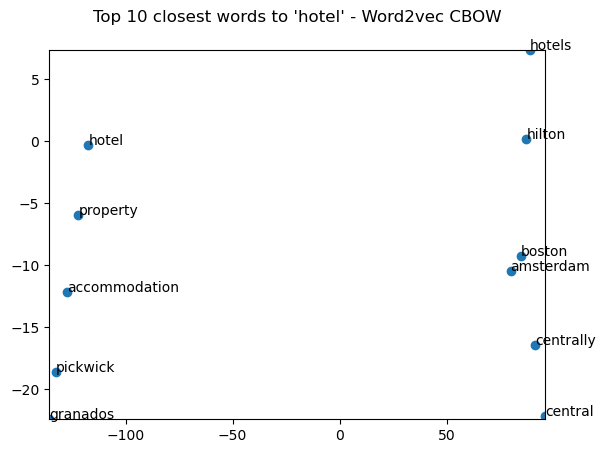

In [61]:
display_closestwords_tsnescatterplot(CBOW.wv, 'CBOW', 'hotel', 100)

In [ ]:
display_closestwords_tsnescatterplot(Skip_Gram.wv, 'Skip-Gram', 'hotel', 100)

In [ ]:
def getWordVectorCBOW(doc):
    return [CBOW.wv[word] for word in doc if word in CBOW.wv.index_to_key]

In [ ]:
word_vectors_CBOW = []
for i in range(len(tokenized_words)):
    word_vectors_CBOW.append(getWordVectorCBOW(tokenized_words[i]))

In [ ]:
def getWordVectorSkipGram(doc):
    return [Skip_Gram.wv[word] for word in doc if word in Skip_Gram.wv.index_to_key]

In [ ]:
word_vectors_Skip_Gram = []
for i in range(len(tokenized_words)):
    word_vectors_Skip_Gram.append(getWordVectorSkipGram(tokenized_words[i]))

In [ ]:
# saving the vectors to disk
pickle_out = open("word2vec_cbow_vectors.pickle", "wb")
pickle.dump(word_vectors_CBOW, pickle_out)
pickle_out.close()

In [ ]:
# saving the vectors to disk
pickle_out = open("word2vec_skip-gram_vectors.pickle", "wb")
pickle.dump(word_vectors_Skip_Gram, pickle_out)
pickle_out.close()